# Figure 1: Cox1 Tree Analysis - Plant and Animal Phylogenies

**Purpose:** Visualize cox1 gene trees for major plant and animal phyla  
**Output:** Side-by-side fan plots of plant (Streptophyta) and animal (Chordata) trees

## Setup

In [ ]:
# Load required libraries and utility functions
suppressMessages(source("code/utils/utils.R"))

## Data Loading

In [5]:
# Load cox1 tree from the specified data source
# Tree from: https://www.sciencedirect.com/org/science/article/pii/S2534970821000028#aep-e-component-id12
cox1 <- read.tree("data/cox1.tre")

# Display basic tree information
print(paste("Number of tips:", Ntip(cox1)))
print(paste("Number of nodes:", Nnode(cox1)))

[1] "Number of tips: 1109"


[1] "Number of nodes: 1107"


## Data Processing

In [6]:
# Extract major plant and animal phyla
plant_cox1 <- keep.tip(cox1, cox1$tip.label[grep("Streptophyta", cox1$tip.label)])
nonplant_cox1 <- keep.tip(cox1, cox1$tip.label[grep("Chordata", cox1$tip.label)])

print(paste("Plant (Streptophyta) tips:", Ntip(plant_cox1)))
print(paste("Animal (Chordata) tips:", Ntip(nonplant_cox1)))

[1] "Plant (Streptophyta) tips: 107"


[1] "Animal (Chordata) tips: 197"


## Animal Tree Processing and Plotting

In [7]:
# Remove outlier branches based on 95th percentile threshold
L <- quantile(nonplant_cox1$edge.length, 0.95)
tip_edges <- which(nonplant_cox1$edge[, 2] <= Ntip(nonplant_cox1))
too_long_edges <- tip_edges[nonplant_cox1$edge.length[tip_edges] > L]
tips_2_drop <- nonplant_cox1$tip.label[nonplant_cox1$edge[too_long_edges, 2]]
nonplant_cox1 <- drop.tip(nonplant_cox1, tips_2_drop)

print(paste("Removed", length(tips_2_drop), "outlier tips from animal tree"))
print(paste("Final animal tree tips:", Ntip(nonplant_cox1)))

[1] "Removed 19 outlier tips from animal tree"
[1] "Final animal tree tips: 178"


## Plant Tree Processing and Plotting

In [8]:
# Remove outlier branches based on 95th percentile threshold
L <- quantile(plant_cox1$edge.length, 0.95)
tip_edges <- which(plant_cox1$edge[, 2] <= Ntip(plant_cox1))
too_long_edges <- tip_edges[plant_cox1$edge.length[tip_edges] > L]
tips_2_drop <- plant_cox1$tip.label[plant_cox1$edge[too_long_edges, 2]]
plant_cox1 <- drop.tip(plant_cox1, tips_2_drop)

print(paste("Removed", length(tips_2_drop), "outlier tips from plant tree"))
print(paste("Final plant tree tips:", Ntip(plant_cox1)))

[1] "Removed 10 outlier tips from plant tree"
[1] "Final plant tree tips: 97"


## Visualization: Side-by-Side Fan Plots

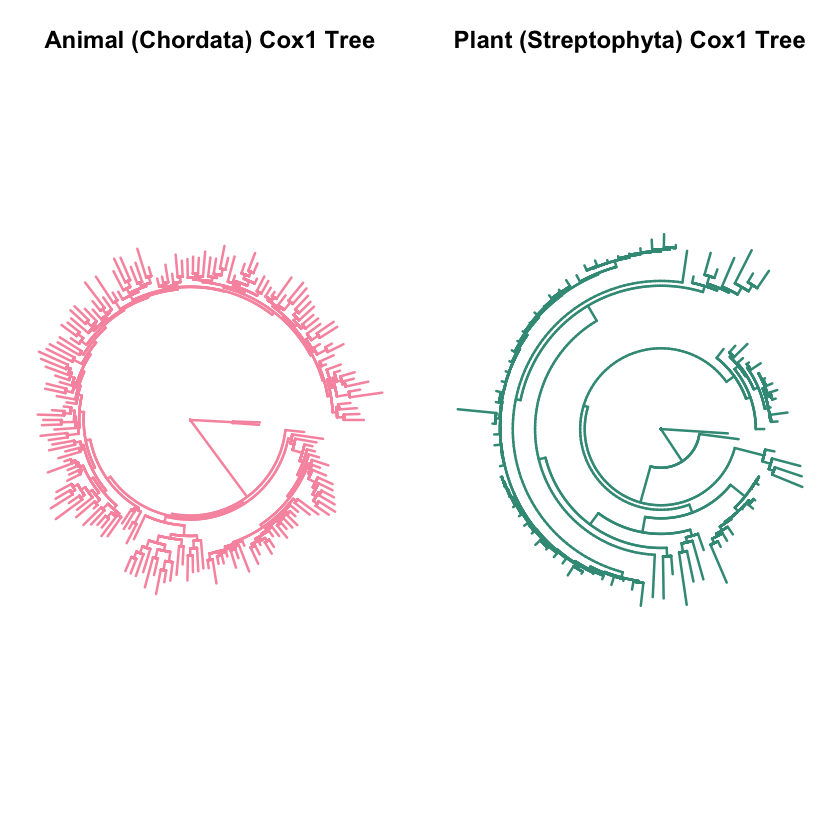

In [9]:
# Set up plotting parameters for side-by-side plots
par(mfrow = c(1, 2),
    mar = c(1, 1, 1, 1))

# Plot animal tree (Chordata) in pink
plot(nonplant_cox1,
     show.tip.label = FALSE,
     edge.color = "#F898AE",
     edge.width = 2,
     type = "fan")
title("Animal (Chordata) Cox1 Tree", line = -1)

# Plot plant tree (Streptophyta) in green
plot(plant_cox1,
     show.tip.label = FALSE,
     edge.color = "#3B9886",
     edge.width = 2,
     type = "fan")
title("Plant (Streptophyta) Cox1 Tree", line = -1)

## Summary

This analysis:
1. Loads the cox1 gene tree from eukaryotic data
2. Extracts plant (Streptophyta) and animal (Chordata) subtrees
3. Removes outlier branches using 95th percentile thresholds
4. Creates side-by-side fan plot visualizations

The resulting plots show the phylogenetic relationships within major plant and animal lineages based on cox1 gene sequences.